# Rainfall, Bikers, and Border Crossings: Investigating Correlations in Constance
__Surprising insights: How rain fails to impact border crossings in Constance__


For this report, I used open data from Mobilithek (https://mobilithek.info/offers/-6759756997530398389 and https://mobilithek.info/offers/-7161835583190029268) to render graphs that show there is no correlation between the weather conditions in Constance and the number of vehicles crossing the border during rainy weather. The measured rainfall comes from data collected by a bike counter located in Constance, while the boarder crossing data comes from counters at the respective boarder crossings. Both datasets needed to be aggregated from multiple files and could be brought in a format where the data is hourly aggregated. In the data pipeline (datagetter.py) the data was already uniformized, cleaned and merged so that I can focus on the analysis here. For some more different viewing angles on the data, please also check out the exploratory notebook (exploration.ipynb). The amount of hourly measurements considered is from the years 2020 to 2021 and, after removal of faulty periods, consists of 12189 hourly time intervals measured over the course of the two years.


The main question that interested me was: _What is the correlation between the amount of rainfall in Constance and the amount of border crossings in Constance?_

And some further questions in relation to that were:
_Are there less border crossings on sunny days? Are there less border crossings on days when many bikers are on the roads in Constance? Or is there no meaningful correlation at all?_

In the following Jupyter notebook, I visualize that the weather conditions are quite unrelated to the number of vehicles crossing the border. To do so, the dependencies are installed and the data that was generated by my data pipeline is imported. To answer the main question, an analysis of the relationship between precipitation and the number of border crossings is needed. A correlation matrix is created, as well as a mean and median comparison. The main question is answered after this analysis. I did some further analysis and showed the positive correlation between temperature and border crossings as a reference. In the further analysis, the impact of Sunday and the default work hours can be observed. The report ends with a brief summary of the findings.

## Install dependencies
Initially, all required dependencies are installed. The specific version of SQLAlchemy is needed because SQLAlchemy 2.0 does not work with pandas yet. nbformat allows the use of the "notebook" formatter for the plot, others can not be rendered to HTML.

In [150]:
%pip install pandas
%pip install plotly
%pip install numpy
%pip install 'SQLAlchemy==1.4.46'
%pip install nbformat
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: "'SQLAlchemy==1.4.46'"

[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Load data
Create a pandas dataframe using the local sqlite file.

In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_TPZ = pd.read_sql_table('TPZ_data', 'sqlite:///../data/preprocessed-data.sqlite')
df_EmZ = pd.read_sql_table('EmZ_data', 'sqlite:///../data/preprocessed-data.sqlite')
df_bikes = pd.read_sql_table('bikes_data', 'sqlite:///../data/preprocessed-data.sqlite')
df_merged = pd.read_sql_table('merged_data', 'sqlite:///../data/preprocessed-data.sqlite')

# Calculate Total Border Crossings
df_merged['Total Border Crossings'] = df_merged['TPZCH'] + df_merged['TPZD'] + df_merged['EmZCH'] + df_merged['EmZD']

## What Influence does rain have on the amount of vehicles on the road?

To answer our initial question, we use matplotlib to draw a barchart of the amounts of vehicles and cyclists during specific weather conditions. 

- Rainy weather: equal or more then 0.1mm of rain was measured during one hour
- Sunny weather: less 0.1mm of rain measured. 

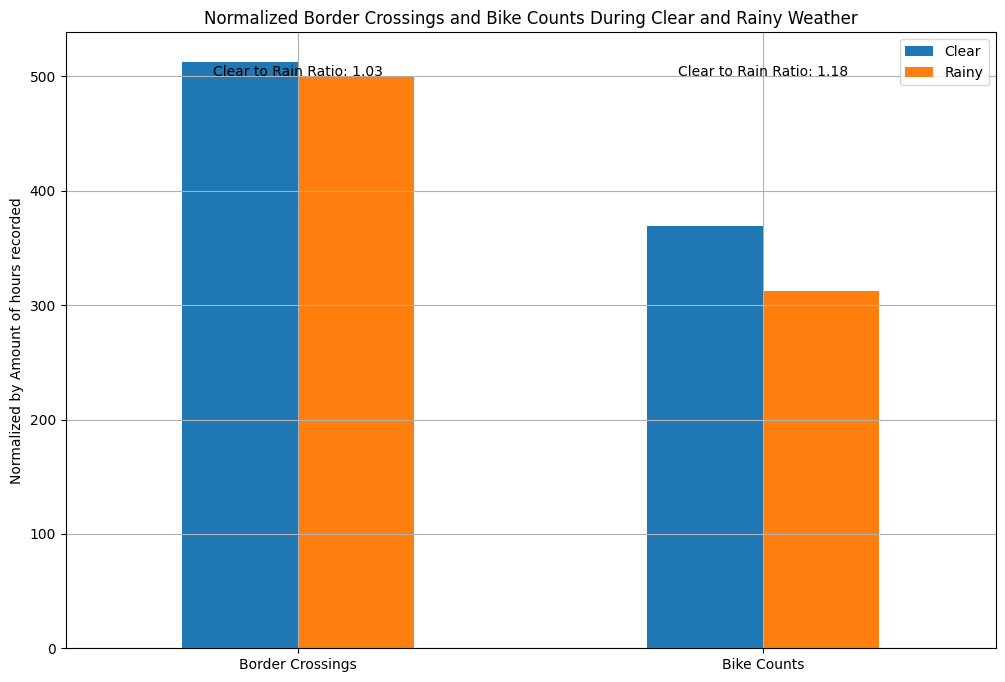

In [152]:
# Define clear and rainy conditions based on 'Regen (mm)'
clear_weather_df = df_merged[df_merged['Regen (mm)'] < 0.1]
rainy_weather_df = df_merged[df_merged['Regen (mm)'] >= 0.1]

# Clear Weather Calculations
total_border_crossings_clear = clear_weather_df[['TPZCH', 'TPZD', 'EmZCH', 'EmZD']].sum().sum()
total_bike_counts_clear = clear_weather_df['Fahrradbruecke total'].sum()

# Rainy Weather Calculations
total_border_crossings_rainy = rainy_weather_df[['TPZCH', 'TPZD', 'EmZCH', 'EmZD']].sum().sum()
total_bike_counts_rainy = rainy_weather_df['Fahrradbruecke total'].sum()

# Calculate total records
total_records_clear = len(clear_weather_df)
total_records_rainy = len(rainy_weather_df)

# Calculate normalized values for clear conditions
total_border_crossings_clear_normalized = total_border_crossings_clear / total_records_clear
total_bike_counts_clear_normalized = total_bike_counts_clear / total_records_clear

# Calculate normalized values for rainy conditions
total_border_crossings_rainy_normalized = total_border_crossings_rainy / total_records_rainy
total_bike_counts_rainy_normalized = total_bike_counts_rainy / total_records_rainy

# Calculate the ratios
ratio_clear = total_border_crossings_clear_normalized / total_border_crossings_rainy_normalized
ratio_rainy = total_bike_counts_clear_normalized / total_bike_counts_rainy_normalized

# Prepare data for the plot
weather_data = {
    'Clear': [
        total_border_crossings_clear_normalized,
        total_bike_counts_clear_normalized
    ],
    'Rainy': [
        total_border_crossings_rainy_normalized,
        total_bike_counts_rainy_normalized
    ]
}

df_weather = pd.DataFrame(weather_data, index=['Border Crossings', 'Bike Counts'])

# Create a grouped bar plot
ax = df_weather.plot(kind='bar', figsize=(12, 8))

plt.title('Normalized Border Crossings and Bike Counts During Clear and Rainy Weather')
plt.ylabel('Normalized by Amount of hours recorded')
plt.grid(True)
plt.xticks(rotation=0)  # Rotate x-axis labels

# Add ratio labels to the plot
ax.text(0, df_weather.loc['Border Crossings', 'Rainy'] + 0.02, f'Clear to Rain Ratio: {ratio_clear:.2f}', ha='center')
ax.text(1, df_weather.loc['Border Crossings', 'Rainy'] + 0.02, f'Clear to Rain Ratio: {ratio_rainy:.2f}', ha='center')

plt.show()



It appears that rain has a slightly higher impact on the bikers than on the motorized vehicles.

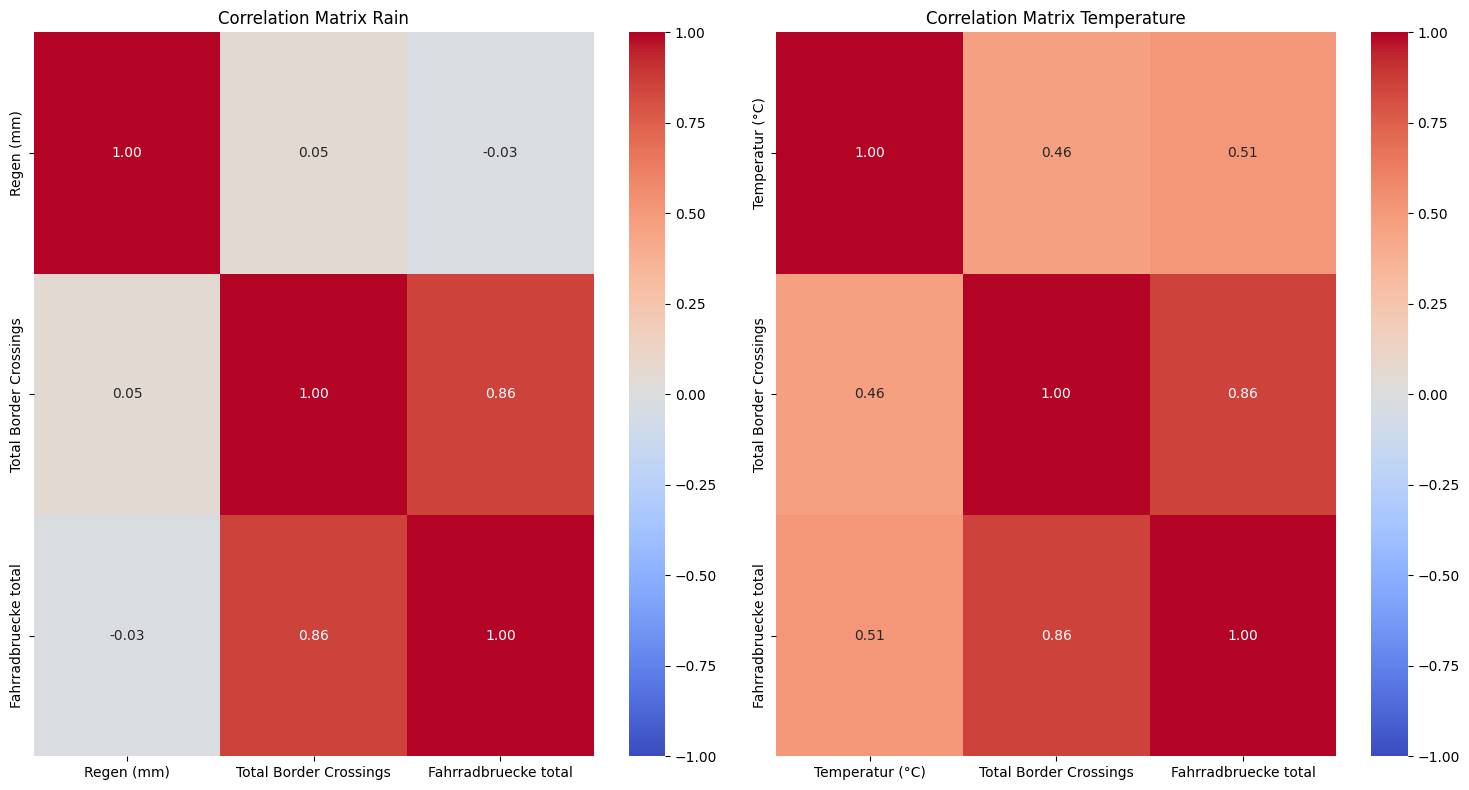

In [153]:
# Calculate correlation matrix for rainfall
corr_matrix_rain = df_merged[['Regen (mm)', 'Total Border Crossings', 'Fahrradbruecke total']].corr()

# Create heatmap for rainfall
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
sns.heatmap(corr_matrix_rain, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, ax=axs[0])
axs[0].set_title('Correlation Matrix Rain')

# Rotate x-axis labels for rainfall plot
for item in axs[0].get_xticklabels():
    item.set_rotation(0)

# Calculate correlation matrix for temperature
corr_matrix_temp = df_merged[['Temperatur (°C)', 'Total Border Crossings', 'Fahrradbruecke total']].corr()

# Create heatmap for temperature
sns.heatmap(corr_matrix_temp, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, ax=axs[1])
axs[1].set_title('Correlation Matrix Temperature')

# Rotate x-axis labels for temperature plot
for item in axs[1].get_xticklabels():
    item.set_rotation(0)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



The influence however if there is any appears to be marginal. A Inspection of the correlation rather shows that the Rain is independent from the total boarder crossings and vice versa. The biker count appears to be very very slightly negativly correlated with the rainfall. This can be seen in the following to graphs showing the mean and median of hours with and without rainfall compared.

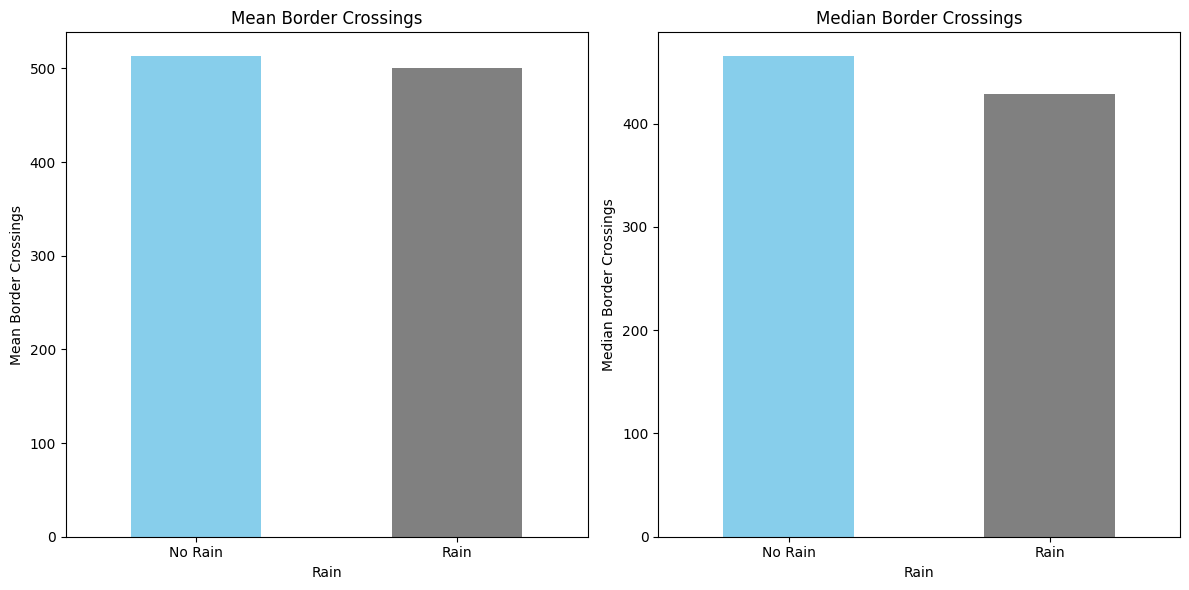

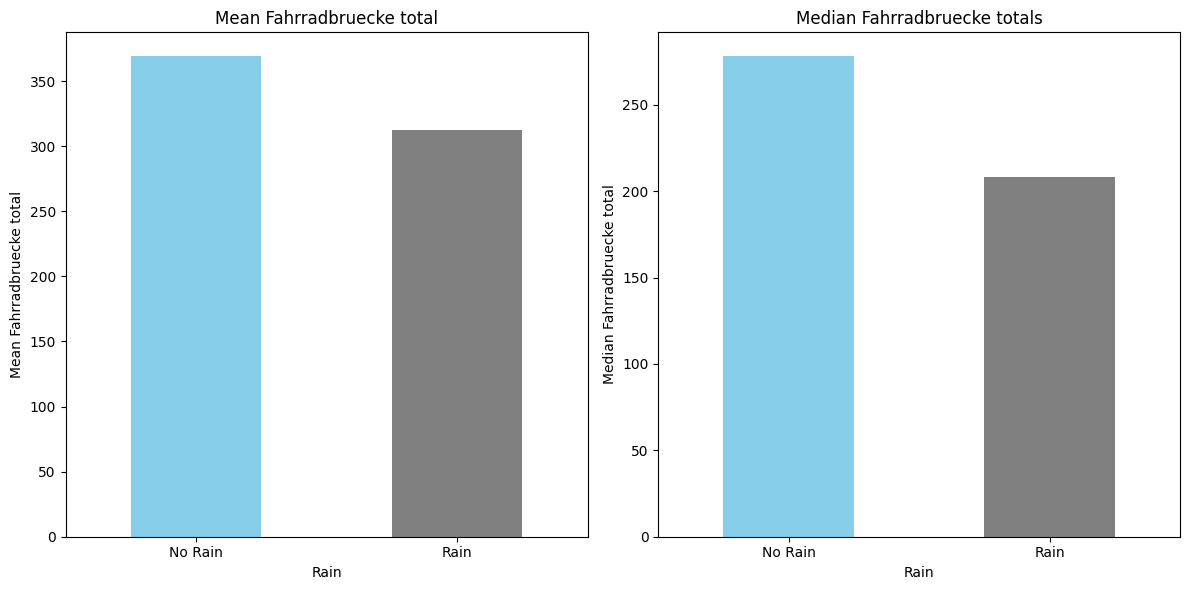

In [154]:
# Create binary rain/no rain feature
df_merged['Rain'] = df_merged['Regen (mm)'] > 0.01

# Calculate means or medians of border crossings for both rain categories
means = df_merged.groupby('Rain')['Total Border Crossings'].mean()
medians = df_merged.groupby('Rain')['Total Border Crossings'].median()

# Create bar plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
means.plot(kind='bar', color=['skyblue', 'gray'])
plt.title('Mean Border Crossings')
plt.xticks([0, 1], ['No Rain', 'Rain'], rotation=0)
plt.ylabel('Mean Border Crossings')

plt.subplot(1, 2, 2)
medians.plot(kind='bar', color=['skyblue', 'gray'])
plt.title('Median Border Crossings')
plt.xticks([0, 1], ['No Rain', 'Rain'], rotation=0)
plt.ylabel('Median Border Crossings')

plt.tight_layout()
plt.show()


# Calculate means or medians of border crossings for both rain categories
means = df_merged.groupby('Rain')['Fahrradbruecke total'].mean()
medians = df_merged.groupby('Rain')['Fahrradbruecke total'].median()

# Create bar plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
means.plot(kind='bar', color=['skyblue', 'gray'])
plt.title('Mean Fahrradbruecke total')
plt.xticks([0, 1], ['No Rain', 'Rain'], rotation=0)
plt.ylabel('Mean Fahrradbruecke total')

plt.subplot(1, 2, 2)
medians.plot(kind='bar', color=['skyblue', 'gray'])
plt.title('Median Fahrradbruecke totals')
plt.xticks([0, 1], ['No Rain', 'Rain'], rotation=0)
plt.ylabel('Median Fahrradbruecke total')

plt.tight_layout()
plt.show()

## With this data, the first question can now be answered:

_What is the correlation between the amount of rainfall in Constance and the amount of border crossings in Constance?_

> According to the data analyzed, there are only negligible less boarder crossings during rainy hours than during clear hours. It is highly likely that the amount of rainfall and the amount of border crossings in Constance are independent.

To answer the further questions please take a look at the following graphs:

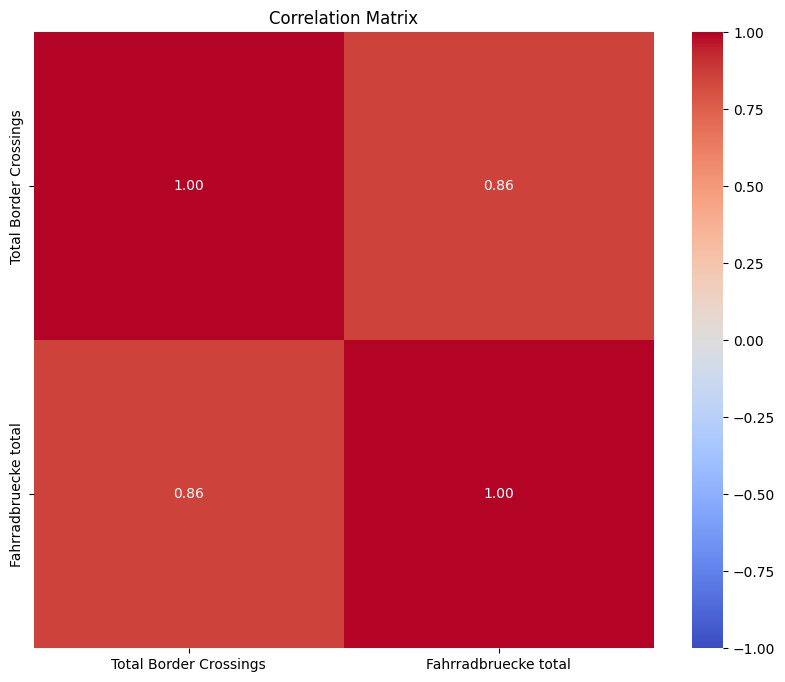

In [155]:
# Calculate correlation matrix
corr_matrix = df_merged[['Total Border Crossings', 'Fahrradbruecke total']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)  # Set vmin and vmax
plt.title('Correlation Matrix')
plt.show()


This correlation matrix shows a fairly strong positive relationship between the total boarder crossings and the total number of cyclists.

In [156]:
# Calculate the 90th percentile of 'Fahrradbruecke total'
top_10_percent_value = df_merged['Fahrradbruecke total'].quantile(0.90)

# Create a new dataframe for the days in the top 10%
df_top_10_percent_days = df_merged[df_merged['Fahrradbruecke total'] > top_10_percent_value]

# Calculate the average 'Total Border Crossings' for the top 10% days
avg_border_crossings_top_10_percent_days = df_top_10_percent_days['Total Border Crossings'].mean()

# Create a new dataframe for all other days
df_other_days = df_merged[df_merged['Fahrradbruecke total'] <= top_10_percent_value]

# Calculate the average 'Total Border Crossings' for all other days
avg_border_crossings_other_days = df_other_days['Total Border Crossings'].mean()

print(f"Average Border Crossings on top 10% most bikers observed days: {avg_border_crossings_top_10_percent_days:.0f}/h")
print(f"Average Border Crossings on all other days: {avg_border_crossings_other_days:.0f}/h")


Average Border Crossings on top 10% most bikers observed days: 1038/h
Average Border Crossings on all other days: 450/h


This further underlines the observed positive relation. This means that the rest of the questions can be answered as well.

_Are there less border crossings on sunny days?_ 
> Quite the opposite is the case. When formulating this question I thought of comparing the vehicles observed on constances city roads to the amount of cyclists. The measures at the boarder crossings however do measure the traffic crossing the boarders, and most likely only a certain small percentage of vehicles crossing the boarder actually has constance as a target. This leads to no meaningful correlation between the two.

_Are there less border crossings on days when many bikers are on the roads in Constance?_
> Again the opposite is observed. Bikers likely have the same work hours as drivers and as such during high traffic times there will also be many bikers on the roads.

_Or is there no meaningful correlation at all?_
> This is the case.



## Further Investigation

I will create some scatter plots to get another perspective on the data.

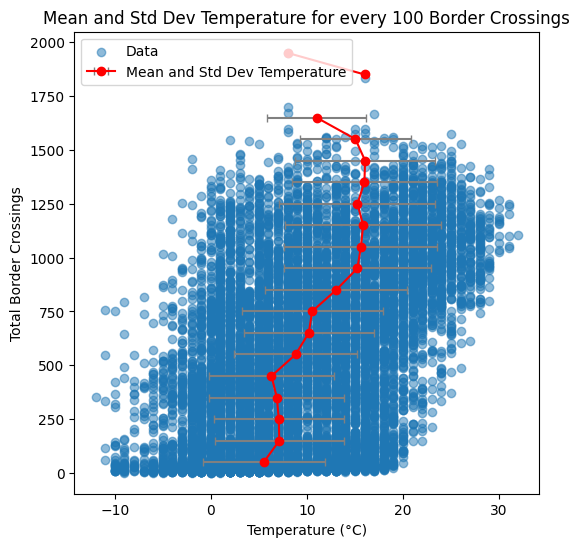

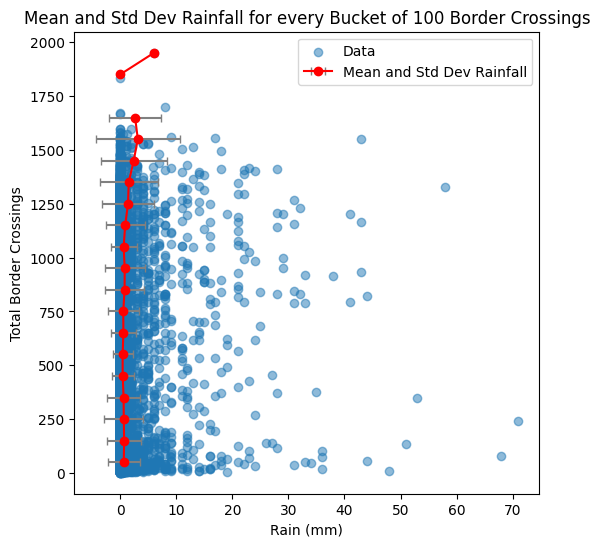

In [157]:
# Define the bins
bins = range(0, df_merged['Total Border Crossings'].max() + 100, 100)

# Create a new column 'Binned Border Crossings' that categorizes 'Total Border Crossings' into bins
df_merged['Binned Border Crossings'] = pd.cut(df_merged['Total Border Crossings'], bins, include_lowest=True, right=False)

# Group by 'Binned Border Crossings' and calculate the mean and standard deviation of 'Temperatur (°C)'
grouped_means = df_merged.groupby('Binned Border Crossings')['Temperatur (°C)'].mean()
grouped_std = df_merged.groupby('Binned Border Crossings')['Temperatur (°C)'].std()

plt.figure(figsize=(6,6))
plt.scatter(df_merged['Temperatur (°C)'], df_merged['Total Border Crossings'], label='Data', alpha=0.5)

# Add means and standard deviations as error bars
plt.errorbar(grouped_means, range(50, df_merged['Total Border Crossings'].max(), 100), 
             xerr=grouped_std, fmt='o-', color='red', ecolor='gray', capsize=3, label='Mean and Std Dev Temperature')

plt.xlabel('Temperature (°C)')
plt.ylabel('Total Border Crossings')
plt.title('Mean and Std Dev Temperature for every 100 Border Crossings')
plt.legend()
plt.show()



# Now plot the rain to boarder crossings
# Define the bins
bins = range(0, df_merged['Total Border Crossings'].max() + 100, 100)

# Create a new column 'Binned Border Crossings' that categorizes 'Total Border Crossings' into bins
df_merged['Binned Border Crossings'] = pd.cut(df_merged['Total Border Crossings'], bins, include_lowest=True, right=False)

# Group by 'Binned Border Crossings' and calculate the mean and standard deviation of 'Regen (mm)'
grouped_means = df_merged.groupby('Binned Border Crossings')['Regen (mm)'].mean()
grouped_std = df_merged.groupby('Binned Border Crossings')['Regen (mm)'].std()

plt.figure(figsize=(6,6))
plt.scatter(df_merged['Regen (mm)'], df_merged['Total Border Crossings'], label='Data', alpha=0.5)

# Add means and standard deviations as error bars
plt.errorbar(grouped_means, range(50, df_merged['Total Border Crossings'].max(), 100), 
             xerr=grouped_std, fmt='o-', color='red', ecolor='gray', capsize=3, label='Mean and Std Dev Rainfall')

plt.xlabel('Rain (mm)')
plt.ylabel('Total Border Crossings')
plt.title('Mean and Std Dev Rainfall for every Bucket of 100 Border Crossings')
plt.legend()
plt.show()






Which again shows the positive correlation between temperature and boarder crossings: There are more boarder crossings observed during higher temperatures and less during lower temperatures. This, of course, also aligns with the typical work hours which are more likely to be effectively correlated than the temperatures which probably are coincidentally correlated. The following two graphs indicate that it is quite probable that the boarder crossings are totally independent of the temperature.

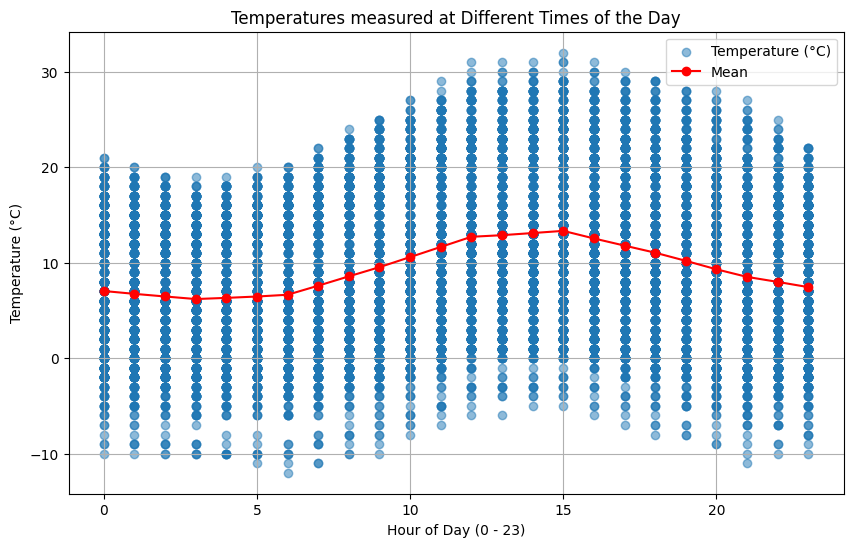

In [158]:
# Create a new column representing the hour of the day
df_merged['Hour of Day'] = df_merged['Start DateTime'].dt.hour

# Group by 'Hour of Day' and calculate mean of 'Total Border Crossings'
mean_border_crossings = df_merged.groupby('Hour of Day')['Temperatur (°C)'].mean()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['Hour of Day'], df_merged['Temperatur (°C)'], alpha=0.5)
plt.plot(mean_border_crossings.index, mean_border_crossings.values, color='red', marker='o')  # plot mean line

plt.xlabel('Hour of Day (0 - 23)')
plt.ylabel('Temperature (°C)')
plt.title('Temperatures measured at Different Times of the Day')
plt.grid(True)

plt.legend(['Temperature (°C)', 'Mean'])
plt.show()

The human working hours can be read from the data

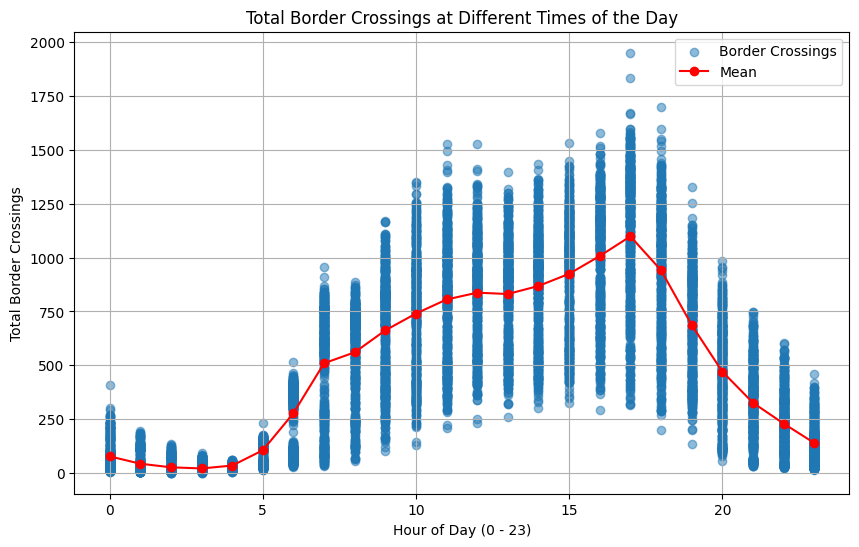

In [159]:
# Create a new column representing the hour of the day
df_merged['Hour of Day'] = df_merged['Start DateTime'].dt.hour

# Group by 'Hour of Day' and calculate mean of 'Total Border Crossings'
mean_border_crossings = df_merged.groupby('Hour of Day')['Total Border Crossings'].mean()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['Hour of Day'], df_merged['Total Border Crossings'], alpha=0.5)
plt.plot(mean_border_crossings.index, mean_border_crossings.values, color='red', marker='o')  # plot mean line

plt.xlabel('Hour of Day (0 - 23)')
plt.ylabel('Total Border Crossings')
plt.title('Total Border Crossings at Different Times of the Day')
plt.grid(True)

plt.legend(['Border Crossings', 'Mean'])
plt.show()



So can the impact of Sunday. The months do not really show much impact.

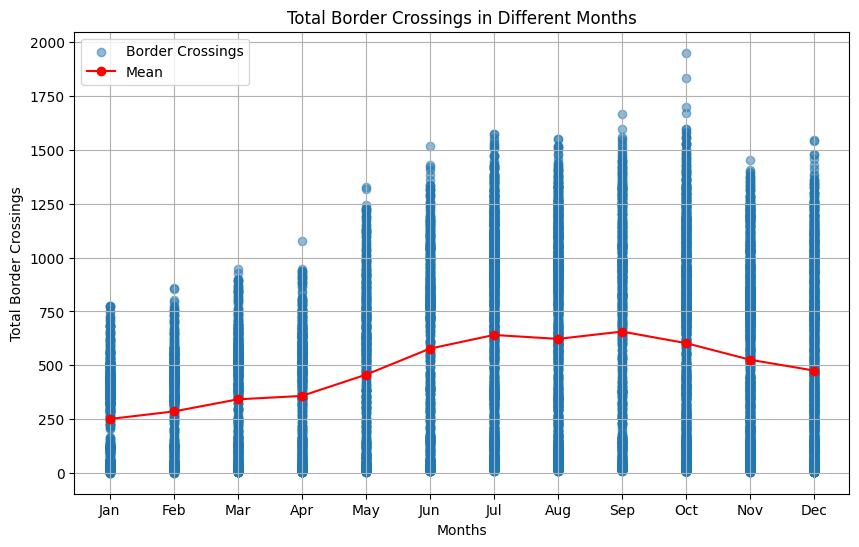

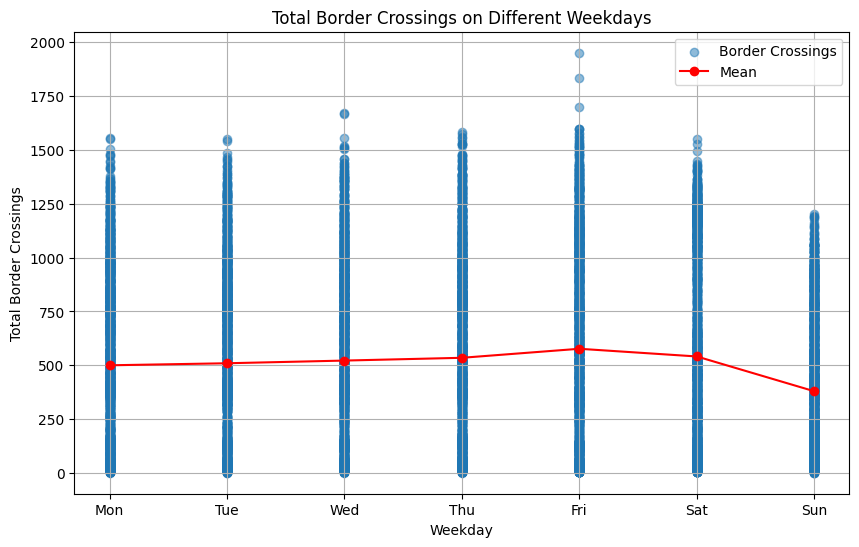

In [160]:
# Create a new column representing the month
df_merged['Month'] = df_merged['Start DateTime'].dt.month

# Group by 'Month' and calculate mean of 'Total Border Crossings'
mean_border_crossings = df_merged.groupby('Month')['Total Border Crossings'].mean()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['Month'], df_merged['Total Border Crossings'], alpha=0.5)
plt.plot(mean_border_crossings.index, mean_border_crossings.values, color='red', marker='o')  # plot mean line

plt.xlabel('Months')
plt.ylabel('Total Border Crossings')
plt.title('Total Border Crossings in Different Months')
plt.grid(True)

plt.legend(['Border Crossings', 'Mean'])
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


# Create a new column representing the weekday
df_merged['Weekday'] = df_merged['Start DateTime'].dt.weekday

# Group by 'Weekday' and calculate mean of 'Total Border Crossings'
mean_border_crossings = df_merged.groupby('Weekday')['Total Border Crossings'].mean()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['Weekday'], df_merged['Total Border Crossings'], alpha=0.5)
plt.plot(mean_border_crossings.index, mean_border_crossings.values, color='red', marker='o')  # plot mean line

plt.xlabel('Weekday')
plt.ylabel('Total Border Crossings')
plt.title('Total Border Crossings on Different Weekdays')
plt.grid(True)

plt.legend(['Border Crossings', 'Mean'])
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()



And the same view on the data for the bikers is shown below as well. Interestingly the biker data shows what might be a _summer holiday dip_ in August.


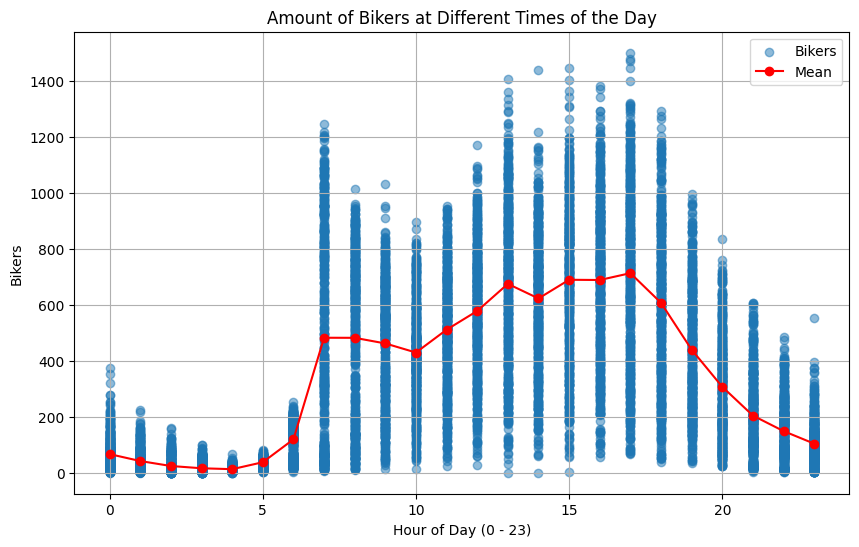

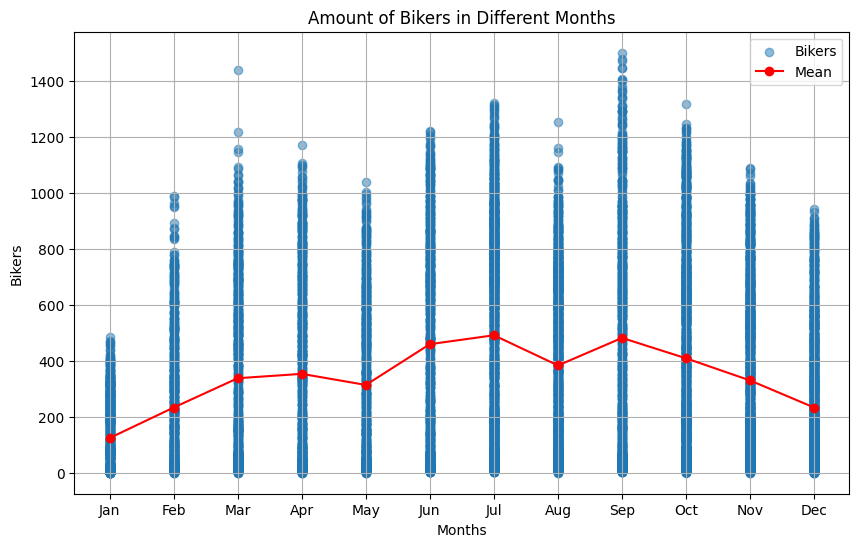

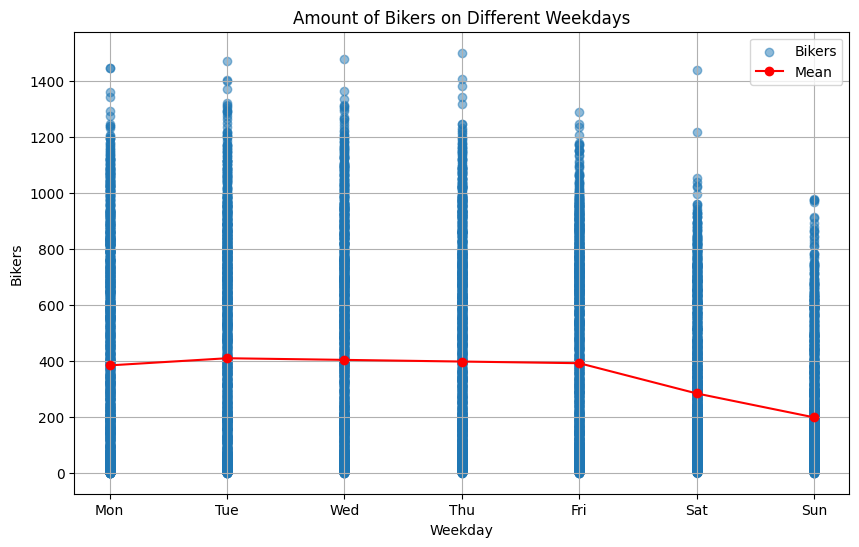

In [161]:
# Plot for Bikers over hours
# Create a new column representing the hour of the day
df_merged['Hour of Day'] = df_merged['Start DateTime'].dt.hour

# Group by 'Hour of Day' and calculate mean of 'Total Border Crossings'
mean_border_crossings = df_merged.groupby('Hour of Day')['Fahrradbruecke total'].mean()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['Hour of Day'], df_merged['Fahrradbruecke total'], alpha=0.5)
plt.plot(mean_border_crossings.index, mean_border_crossings.values, color='red', marker='o')  # plot mean line

plt.xlabel('Hour of Day (0 - 23)')
plt.ylabel('Bikers')
plt.title('Amount of Bikers at Different Times of the Day')
plt.grid(True)

plt.legend(['Bikers', 'Mean'])
plt.show()

# Plot for Bikers over Months
# Create a new column representing the month
df_merged['Month'] = df_merged['Start DateTime'].dt.month

# Group by 'Month' and calculate mean
mean_border_crossings = df_merged.groupby('Month')['Fahrradbruecke total'].mean()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['Month'], df_merged['Fahrradbruecke total'], alpha=0.5)
plt.plot(mean_border_crossings.index, mean_border_crossings.values, color='red', marker='o')  # plot mean line

plt.xlabel('Months')
plt.ylabel('Bikers')
plt.title('Amount of Bikers in Different Months')
plt.grid(True)

plt.legend(['Bikers', 'Mean'])
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Plot for Bikers over Week days
# Create a new column representing the weekday
df_merged['Weekday'] = df_merged['Start DateTime'].dt.weekday

# Group by 'Weekday' and calculate mean
mean_border_crossings = df_merged.groupby('Weekday')['Fahrradbruecke total'].mean()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['Weekday'], df_merged['Fahrradbruecke total'], alpha=0.5)
plt.plot(mean_border_crossings.index, mean_border_crossings.values, color='red', marker='o')  # plot mean line

plt.xlabel('Weekday')
plt.ylabel('Bikers')
plt.title('Amount of Bikers on Different Weekdays')
plt.grid(True)

plt.legend(['Bikers', 'Mean'])
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


Last but not least, the ever so slightly negative correlation between rain and bike riding as a scatter plot. Which can be seen by the standard deviation getting more and more slim and the mean moving ever so slightly to the left the bikers are observed. Of corse for the top values of boarder crossings this does not apply due to less datapoints in that area.

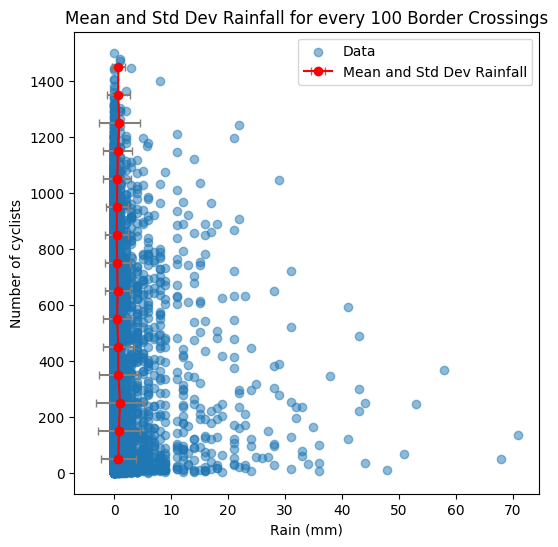

In [162]:
# Now plot the rain to boarder crossings
# Define the bins
bins = range(0, df_merged['Fahrradbruecke total'].max() + 100, 100)

# Create a new column 'Binned Border Crossings' that categorizes 'Fahrradbruecke total' into bins
df_merged['Binned Border Crossings'] = pd.cut(df_merged['Fahrradbruecke total'], bins, include_lowest=True, right=False)

# Group by 'Binned Border Crossings' and calculate the mean and standard deviation of 'Regen (mm)'
grouped_means = df_merged.groupby('Binned Border Crossings')['Regen (mm)'].mean()
grouped_std = df_merged.groupby('Binned Border Crossings')['Regen (mm)'].std()

plt.figure(figsize=(6,6))
plt.scatter(df_merged['Regen (mm)'], df_merged['Fahrradbruecke total'], label='Data', alpha=0.5)

# Add means and standard deviations as error bars
plt.errorbar(grouped_means, range(50, df_merged['Fahrradbruecke total'].max(), 100), 
             xerr=grouped_std, fmt='o-', color='red', ecolor='gray', capsize=3, label='Mean and Std Dev Rainfall')

plt.xlabel('Rain (mm)')
plt.ylabel('Number of cyclists')
plt.title('Mean and Std Dev Rainfall for every 100 Border Crossings')
plt.legend()
plt.show()

## Summary

This notebook analyzed the correlation between weather conditions in Constance and the number of vehicles crossing the border. Open data from Mobilithek was utilized, focusing on the period from 2020 to 2021, encompassing 12189 hourly time intervals. The analysis involves visualizing the data and generating a correlation matrix, mean and median comparison to answer the main question: “What is the correlation between the amount of rainfall in Constance and the amount of border crossings in Constance?”. There was no correlation showing. The data indicated that rainfall does not have any impact on the number of vehicles crossing the border. Further questions regarding the number of border crossings on sunny days and days with many bikers on the road also have been explored. The conclusion is that rainfall seems quite unrelated to the number of vehicles crossing the border. Additional findings include a very marginal impact of rain on the number of bikers on the road, a positive correlation between temperature and border crossings which might be due to the work hours of humanity, and observable impacts of Sundays on traffic.